<a href="https://colab.research.google.com/github/kamalzada/Python-codes/blob/master/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install neuralprophet

     |████████████████████████████████| 67 kB 2.8 MB/s 
     |████████████████████████████████| 155 kB 11.4 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [3]:
from warnings import filterwarnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from sklearn.model_selection import train_test_split

In [4]:
from fbprophet import Prophet

In [7]:
from neuralprophet import NeuralProphet

In [ ]:
raw = pd.read_excel('superstore.xls')
df = raw.copy()

In [ ]:
office = df.loc[df['Category']=='Office Supplies'].reset_index()

In [ ]:
office = office[['Order Date', 'Profit']]

In [ ]:
office.rename(columns={'Order Date': 'ds', 'Profit': 'y'}, inplace=True)

In [ ]:
office['ds'].max(), office['ds'].min() 

(Timestamp('2017-12-30 00:00:00'), Timestamp('2014-01-03 00:00:00'))

In [ ]:
office['ds'] = office['ds'].astype('str')
office['year'] = office['ds'].str[0:4].astype('int64')

In [ ]:
office = office.loc[office['year']==2017].reset_index()

In [ ]:
office = office[['ds', 'y']]

In [ ]:
office['ds'] = office['ds'].astype('datetime64[ns]')

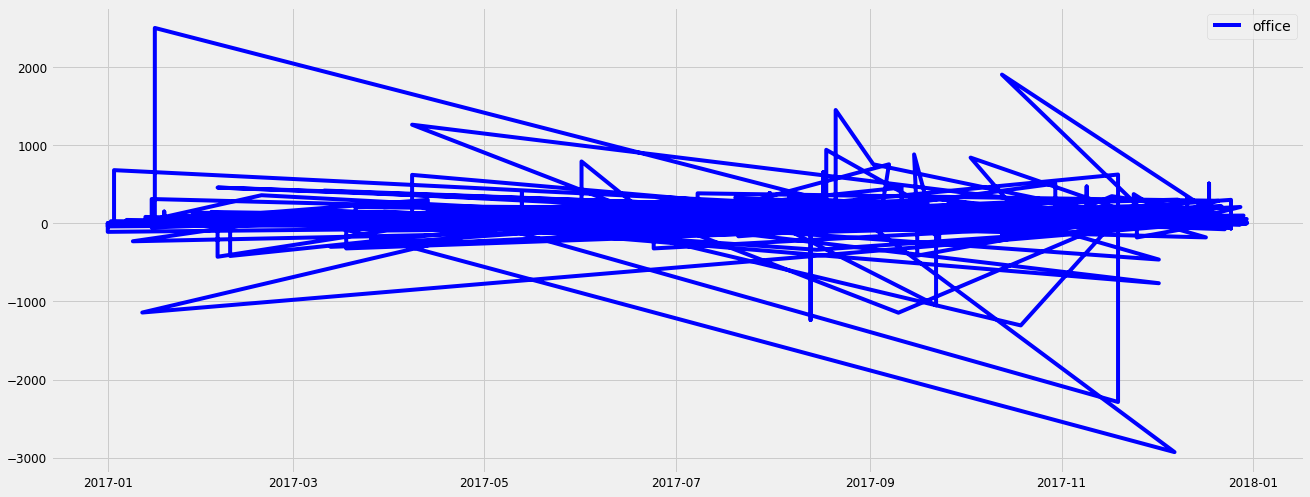

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(office['ds'], office['y'], 'b-', label = 'office')
plt.legend()
plt.show()

In [ ]:
office_model = Prophet(interval_width=0.95, weekly_seasonality=True)

In [ ]:
office_model.fit(office)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = office_model.make_future_dataframe(periods=5, freq='M')


In [ ]:
forecast = office_model.predict(future)

In [ ]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
311,2017-12-31,6.148002,-293.413783,291.055029,6.147703,6.148892,-15.002011,-15.002011,-15.002011,-15.002011,-15.002011,-15.002011,0.0,0.0,0.0,-8.854008
312,2018-01-31,1.806612,-284.839770,306.719448,1.391242,2.268541,-0.075321,-0.075321,-0.075321,-0.075321,-0.075321,-0.075321,0.0,0.0,0.0,1.731291
313,2018-02-28,-2.114644,-284.664861,297.783154,-3.254396,-0.964584,-0.075321,-0.075321,-0.075321,-0.075321,-0.075321,-0.075321,0.0,0.0,0.0,-2.189964
314,2018-03-31,-6.456034,-326.581829,288.839689,-8.481463,-4.354447,-0.635653,-0.635653,-0.635653,-0.635653,-0.635653,-0.635653,0.0,0.0,0.0,-7.091686
315,2018-04-30,-10.657379,-294.869578,309.246263,-13.699125,-7.442258,12.079453,12.079453,12.079453,12.079453,12.079453,12.079453,0.0,0.0,0.0,1.422074


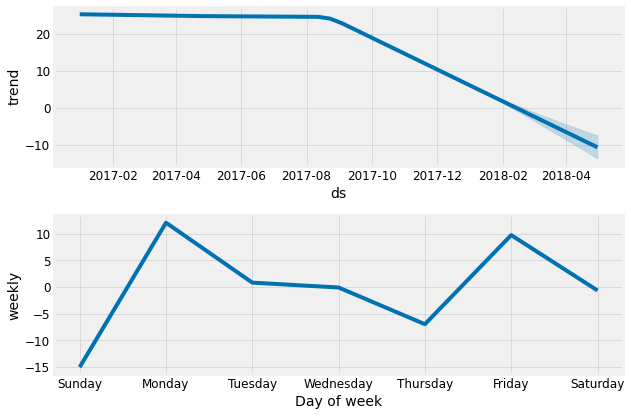

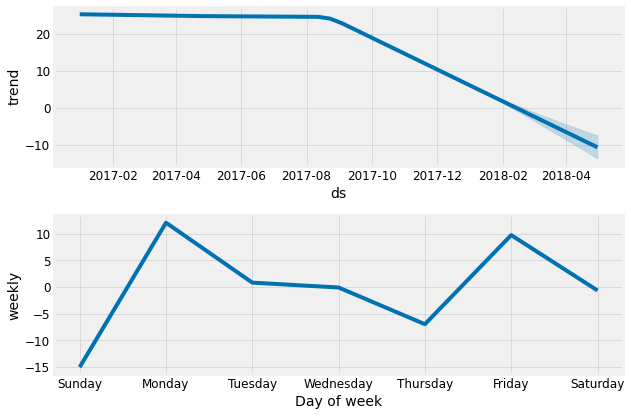

In [ ]:
office_model.plot_components(forecast)

In [ ]:
raw = pd.concat(map(pd.read_csv, ['Data.csv']))
df = raw.copy()

In [ ]:
display(df.info(), df.describe(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4298 non-null   object 
 1   High       4298 non-null   float64
 2   Low        4298 non-null   float64
 3   Open       4298 non-null   float64
 4   Close      4298 non-null   float64
 5   Volume     4298 non-null   float64
 6   Adj Close  4298 non-null   float64
dtypes: float64(6), object(1)
memory usage: 235.2+ KB


None

,High,Low,Open,Close,Volume,Adj Close
count,4298.000000,4298.000000,4298.000000,4298.000000,4.298000e+03,4298.000000
mean,630.103779,618.210523,624.106143,624.358342,6.546994e+06,624.358342
std,544.175379,534.793760,539.047561,539.817047,7.839967e+06,539.817047
min,50.680038,47.800831,49.409801,49.818268,7.922000e+03,49.818268
25%,247.293083,241.098804,244.350361,244.029068,1.600700e+06,244.029068
50%,396.762833,390.531204,394.737930,394.329453,3.875974e+06,394.329453
75%,930.709229,917.917511,925.132477,924.817490,8.285390e+06,924.817490
max,2936.409912,2912.290039,2918.989990,2916.840088,8.254163e+07,2916.840088


,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [ ]:
closing = df[['Date', 'Close']]

In [ ]:
closing.rename(columns={'Date':'ds', 'Close': 'y'}, inplace=True)

In [ ]:
closing['ds'] = closing['ds'].astype('datetime64[ns]') 

In [ ]:
closing['year'] = closing['ds'].apply(lambda x: str(x)[0:4]).astype('int64')

In [ ]:
closing_2021 = closing.loc[closing['year']==2021].reset_index(drop=True).drop('year', axis=1)

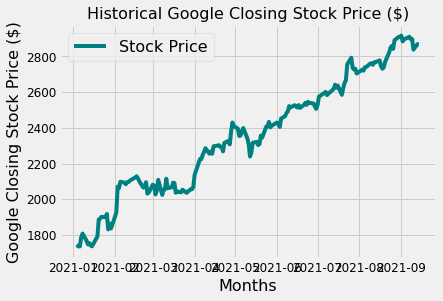

In [ ]:
plt.plot(closing_2021['ds'].values, closing_2021['y'].values, label = 'Stock Price', c = 'teal')
plt.title(label = 'Historical Google Closing Stock Price ($)', fontsize = 16)
plt.ylabel(ylabel = 'Google Closing Stock Price ($)', fontsize = 16)
plt.xlabel(xlabel = 'Months', fontsize = 16)
plt.legend(loc = 'best', fontsize = 16)
plt.show()

In [ ]:
closing_model = Prophet(interval_width=0.95, weekly_seasonality=True)

In [ ]:
closing_model.fit(closing)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_data = closing_model.make_future_dataframe(periods=100, freq='D')

In [ ]:
forecast_data = closing_model.predict(future_data)

In [ ]:
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
271,2021-12-19,3369.843101,3036.747003,3709.336885,3052.060928,3690.868938,3.890809,3.890809,3.890809,3.890809,3.890809,3.890809,0.0,0.0,0.0,3373.733910
272,2021-12-20,3374.502369,3041.441936,3707.205835,3050.179070,3700.100977,-1.857579,-1.857579,-1.857579,-1.857579,-1.857579,-1.857579,0.0,0.0,0.0,3372.644790
273,2021-12-21,3379.161637,3035.475257,3717.028677,3046.943568,3709.333016,-5.737568,-5.737568,-5.737568,-5.737568,-5.737568,-5.737568,0.0,0.0,0.0,3373.424068
274,2021-12-22,3383.820905,3031.372930,3720.327744,3046.592454,3716.214427,-3.668067,-3.668067,-3.668067,-3.668067,-3.668067,-3.668067,0.0,0.0,0.0,3380.152837
275,2021-12-23,3388.480173,3025.998192,3722.342232,3047.423725,3724.307016,-0.920083,-0.920083,-0.920083,-0.920083,-0.920083,-0.920083,0.0,0.0,0.0,3387.560090


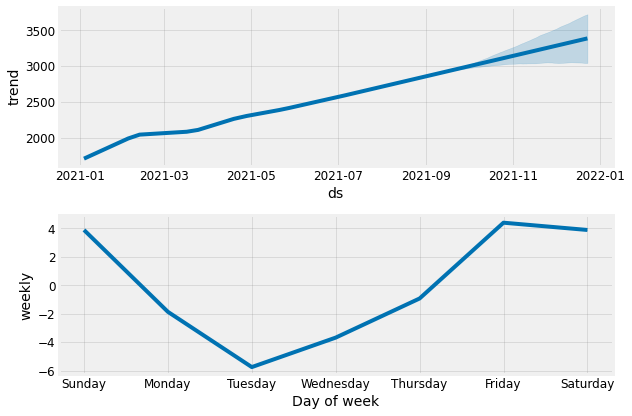

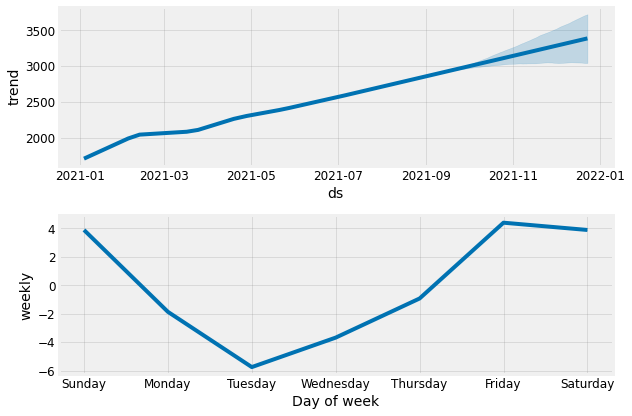

In [ ]:
closing_model.plot_components(forecast_data)

In [8]:
raw = pd.concat(map(pd.read_csv, ['raw_sales.csv']))
df = raw.copy()

In [11]:
display(df.head(), df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


None

In [10]:
df['datesold'] = df['datesold'].astype('datetime64[ns]') 

In [12]:
display(df['bedrooms'].unique(), df['propertyType'].unique())

array([4, 3, 5, 1, 2, 0])

array(['house', 'unit'], dtype=object)

In [29]:
three_bedrooms = df.loc[(df['propertyType']=='house') & (df['bedrooms']==3)].iloc[:,0:3:2].reset_index(drop=True) 

In [30]:
three_bedrooms.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11281 entries, 0 to 11280
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datesold  11281 non-null  datetime64[ns]
 1   price     11281 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.4 KB


In [33]:
three_bedrooms.rename(columns={'datesold': 'ds', 'price': 'y'}, inplace=True)

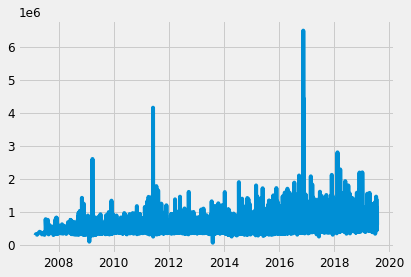

In [40]:
plt.plot(three_bedrooms['ds'], three_bedrooms['y'])
plt.show()